In [1]:
# Шаг 1
import numpy as np
import pandas as pd

In [2]:
# Шаг 2 и 3
df = pd.read_csv("student-mat.csv")

In [3]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [9]:
# Шаг 4
df_part = df.loc[:,:"guardian"]
df_part.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father


In [10]:
# Шаг 5
make_capital = lambda x: x.upper()
# Шаг 6
df['Mjob'].apply(make_capital)
df['Fjob'].apply(make_capital)

0       TEACHER
1         OTHER
2         OTHER
3      SERVICES
4         OTHER
5         OTHER
6         OTHER
7       TEACHER
8         OTHER
9         OTHER
10       HEALTH
11        OTHER
12     SERVICES
13        OTHER
14        OTHER
15        OTHER
16     SERVICES
17        OTHER
18     SERVICES
19        OTHER
20        OTHER
21       HEALTH
22        OTHER
23        OTHER
24       HEALTH
25     SERVICES
26        OTHER
27     SERVICES
28        OTHER
29      TEACHER
         ...   
365       OTHER
366    SERVICES
367    SERVICES
368    SERVICES
369     TEACHER
370    SERVICES
371    SERVICES
372     AT_HOME
373       OTHER
374       OTHER
375       OTHER
376       OTHER
377    SERVICES
378       OTHER
379       OTHER
380     TEACHER
381       OTHER
382    SERVICES
383    SERVICES
384       OTHER
385       OTHER
386     AT_HOME
387       OTHER
388    SERVICES
389       OTHER
390    SERVICES
391    SERVICES
392       OTHER
393       OTHER
394     AT_HOME
Name: Fjob, Length: 395,

In [11]:
# Шаг 7
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [12]:
# Шаг 8
df['Mjob'] = df['Mjob'].apply(make_capital)
df['Fjob'] = df['Fjob'].apply(make_capital)
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,SERVICES,SERVICES,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,SERVICES,SERVICES,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,OTHER,OTHER,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,SERVICES,OTHER,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,OTHER,AT_HOME,...,3,2,3,3,3,5,5,8,9,9


In [13]:
# Шаг 9
df['age'].value_counts()/len(df)

16    0.263291
17    0.248101
18    0.207595
15    0.207595
19    0.060759
20    0.007595
22    0.002532
21    0.002532
Name: age, dtype: float64

In [14]:
# Шаг 10
# по выходным
df.groupby('age')['Walc'].mean()

age
15    1.902439
16    2.278846
17    2.571429
18    2.414634
19    1.958333
20    2.333333
21    3.000000
22    5.000000
Name: Walc, dtype: float64

In [15]:
# по будням
df.groupby('age')['Dalc'].mean()

age
15    1.353659
16    1.432692
17    1.520408
18    1.548780
19    1.458333
20    2.000000
21    3.000000
22    5.000000
Name: Dalc, dtype: float64

In [16]:
# Шаг 11
# по выходным
df.groupby('sex')['Walc'].mean()

sex
F    1.956731
M    2.663102
Name: Walc, dtype: float64

In [17]:
# по будням
df.groupby('sex')['Dalc'].mean()

sex
F    1.254808
M    1.732620
Name: Dalc, dtype: float64

## Опционально

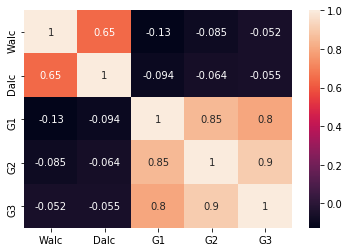

In [21]:
import seaborn as sns

# возьмем нужные для задачи столбцы
df_alc = df[['Walc', 'Dalc', 'G1','G2', 'G3']]

# матрица корреляции (корреялция Пирсона)
sns.heatmap(df_alc.corr(), annot = True)

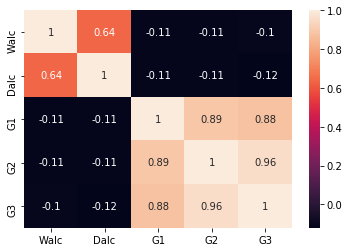

In [22]:
# матрица ранговой корреляции (корреялция Спирмена)
sns.heatmap(df_alc.corr(method = 'spearman'), annot = True)

In [23]:
# средняя финальная оценка взависимости от уровня потрбления алкоголя по выходным
df_alc.groupby('Walc')['G3'].mean()

Walc
1    10.735099
2    10.082353
3    10.725000
4     9.686275
5    10.142857
Name: G3, dtype: float64

In [24]:
# средняя финальная оценка взависимости от уровня потрбления алкоголя по будням
df_alc.groupby('Dalc')['G3'].mean()

Dalc
1    10.731884
2     9.253333
3    10.500000
4     9.888889
5    10.666667
Name: G3, dtype: float64

In [25]:
# наоборот, среднее потребление будничное потребление алкоголя в зависимости от оценки
df_alc.groupby('G3')['Dalc'].mean()

G3
0     1.342105
4     2.000000
5     2.285714
6     1.133333
7     1.555556
8     1.656250
9     1.750000
10    1.535714
11    1.446809
12    1.580645
13    1.903226
14    1.222222
15    1.121212
16    1.375000
17    1.500000
18    1.166667
19    1.000000
20    1.000000
Name: Dalc, dtype: float64

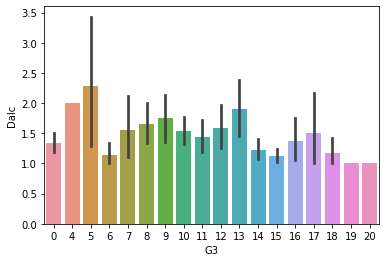

In [26]:
# визуализация этого
sns.barplot(df_alc['G3'], df_alc['Dalc'])

In [27]:
# наибольший процент тех людей, у кого финальная оценка выше среднего находится в группе потребления алкоголя 1 и 5
df_alc[df_alc['G3'] > df_alc['G3'].mean()].groupby('Dalc')['G3'].count()/df_alc.groupby('Dalc')['G3'].count()

Dalc
1    0.568841
2    0.426667
3    0.384615
4    0.444444
5    0.666667
Name: G3, dtype: float64

In [28]:
# впрочем, у категории "5" в dalc наблюдений всего 9
df_alc['Dalc'].value_counts()

1    276
2     75
3     26
5      9
4      9
Name: Dalc, dtype: int64

In [29]:
import scipy.stats 

#p- значения для ранговой корреляции (которые получаются довольно низкими)
print(scipy.stats.spearmanr(df['Dalc'], df['G3']))
print(scipy.stats.spearmanr(df['Walc'], df['G3']))

SpearmanrResult(correlation=-0.12094448004589974, pvalue=0.016175100210280912)
SpearmanrResult(correlation=-0.10445859969861528, pvalue=0.037970377961224634)


Можно сделать вывод, что потребление алкоголя отрицательно влияет на успеваемость, но довольно слабо